In [67]:
!pip install tweepy

In [121]:
#We need to get the necessary library to compute our data wrangling steps
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# Style and size of graph

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})

# Gathering data #

In [122]:
#Getting the original csv file
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [123]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [124]:
#Documentation about twitter API:https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/tweet-object
consumer_key = 'SI4fbbwyWaZLiBDIUtl6Oj1bM'
consumer_secret = 'pHfxFDtgWiZAU0Lcr5fRHSevDPuXkNhtdrNfrgWAgYN1l4IlO1'
access_token = '1305804648658460672-eqxrjyyEmSypiBn7cDwO0cZZLOLMvR'
access_secret = 'Xo21tyuV7N3BQghOB7CcI6YwpXEc4TpSTu7xmVBiGiQj2'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [125]:
# Use Twitter API to collect our data 
#tweet_ids = list(df_twitter['tweet_id'])

#tweet_data = []
#tweet_id_success = []
#tweet_id_missing = []
#for tweet_id in tweet_ids:
#    try:
#        data = api.get_status(tweet_id, 
#                              tweet_mode='extended',
 #                             wait_on_rate_limit = True,
  #                            wait_on_rate_limit_notify = True)
   #     tweet_data.append(data._json)
    #    tweet_id_success.append(tweet_id)
    #except:
     #   tweet_id_missing.append(tweet_id)
      #  print(tweet_id)

In [126]:
# Write tweet data to json file
#with open('tweet_json.txt', mode = 'w') as file:
 #   json_content = tweet_data
  #  json.dump(json_content, file)

In [127]:
df_api = pd.read_json('tweet_json.txt')
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [128]:
#Setting our columns of interest for the API data
df_api = df_api[['id', 'favorite_count', 'retweet_count']]
df_api.head()

,id,favorite_count,retweet_count
0,892420643555336193,35686,7547
1,892177421306343426,30869,5595
2,891815181378084864,23206,3707
3,891689557279858688,38988,7728
4,891327558926688256,37239,8329


In [129]:
df_api.shape

(2331, 3)

# Assess #

In [130]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**df_twitter (Twitter archive) columns:**

- tweet_id: the unique identifier for each tweet
- in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- timestamp: time when this Tweet was created
- source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- text: actual UTF-8 text of the status update
- retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- retweeted_status_timestamp: time of retweet
- expanded_urls: tweet URL
- rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
- rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- name: name of the dog
- doggo: one of the 4 dog "stage"
- floofer: one of the 4 dog "stage"
- pupper: one of the 4 dog "stage"
- puppo: one of the 4 dog "stage"

In [131]:
df_twitter.shape

(2356, 17)

In [132]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1870,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,None,None,None,None


In [133]:
#Checking the numbers of duplicated rows
print(sum(df_twitter.duplicated())),print(sum(df_twitter.tweet_id.duplicated()))

0
0


(None, None)

In [134]:
#Checking the number of unique values
df_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [135]:
#Let's look if there are any denominator value that are not 10
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [136]:
# Sort by rating_denominator values
df_twitter.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [137]:
# How many of the observation are retweet. This data will need to be dropped later
len(df_twitter[df_twitter.retweeted_status_id.isnull() == False])

181

In [138]:
#Let's check how many values in df_twitter.tweet_id don't exist in df_image.tweet_id
len(df_twitter[df_twitter.tweet_id.isin(df_image.tweet_id)]),len(df_twitter[~df_twitter.tweet_id.isin(df_image.tweet_id)])

(2075, 281)

In [139]:
#let's check if some entries have more than one dog stage
len(df_twitter[(df_twitter['doggo'] == 'doggo' ) & (df_twitter['pupper'] == 'pupper')])

12

In [140]:
len(df_twitter[(df_twitter['puppo'] != 'None' ) & (df_twitter['floofer'] != 'None')])

0

In [141]:
len(df_twitter[(df_twitter['doggo'] != 'None' ) & (df_twitter['floofer'] != 'None')])

1

In [142]:
len(df_twitter[(df_twitter['doggo'] == 'doggo' ) & (df_twitter['puppo'] == 'puppo')])

1

In [143]:
len(df_twitter[(df_twitter['pupper'] != 'None' ) & (df_twitter['puppo'] == 'puppo')])

0

In [144]:
len(df_twitter[(df_twitter['pupper'] != 'None' ) & (df_twitter['floofer'] != 'None')])

0

In [145]:
df_image.shape

(2075, 12)

In [146]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [147]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [148]:
df_api.nunique()

id                2331
favorite_count    1988
retweet_count     1682
dtype: int64

**Quality:**
- contains retweets and therefore, duplicates
- many tweet_id(s) of df_twitter table are missing in df_img (image predictions) table
- unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone""  rel=""nofollow"">Twitter for iPhone</a>
- rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176). We are going to prorate them.
- rating_denominator column has values other than 10
- some records have more than one dog stage
- We need to fix the date format
- erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)

**Tidy:**

- We need to merge, join, concat our 3 datasets
- We need to reorganize the prediction and confidence columns to have something clearer

# Clean #

In [149]:
#Let's create some copy of our original datasets
twitter_copy = df_twitter.copy()
img_copy = df_image.copy()
api_copy = df_api.copy()

**1 - Define:** We are going to drop the retweeted lines in our df_twitter dataframe (181 lines)

**Code:**

In [150]:
twitter_copy = twitter_copy[twitter_copy['retweeted_status_user_id'].isnull()]

**Test:**

In [151]:
len(twitter_copy[twitter_copy['retweeted_status_user_id'].isnull() == False])

0

In [152]:
twitter_copy.shape

(2175, 17)

**Let's now remove the retweet columns since they are now empty:**

In [153]:
twitter_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**2 - Define:** 
We need to keep in df_twitter the tweet_id existing in df_image. We can drop the other ones

**Code:**

In [154]:
twitter_copy = twitter_copy[twitter_copy.tweet_id.isin(img_copy.tweet_id)]

**Test:**

In [155]:
twitter_copy.shape

(1994, 12)

In [156]:
twitter_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


**3 - Define:**
Let's change the data format from object to date time format, and then let's separate both the date part and time part of this

**Code:**

In [157]:
# Creating a function to change object to datetime
def object_to_datetime(str):
    return pd.to_datetime(str)

In [158]:
twitter_copy['timestamp'] = twitter_copy['timestamp'].apply(object_to_datetime)

In [159]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [160]:
# extracting date from timestamp
twitter_copy['Date'] = [datetime.datetime.date(d) for d in twitter_copy['timestamp']] 

# extracting time from timestamp
twitter_copy['Time'] = [datetime.datetime.time(d) for d in twitter_copy['timestamp']] 

In [161]:
twitter_copy.drop(['Time'], axis=1, inplace=True)

In [162]:
twitter_copy.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date
1112,733460102733135873,2016-05-20 00:51:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hermione. Her face is as old as time. ...,https://twitter.com/dog_rates/status/733460102...,11,10,Hermione,None,None,None,None,2016-05-20
1852,675707330206547968,2015-12-12 16:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We've got ourselves a battle here. Watch out R...,https://twitter.com/dog_rates/status/675707330...,11,10,None,None,None,None,None,2015-12-12
1975,672997845381865473,2015-12-05 04:36:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenzie. She is a fluff ball. 12/1...,https://twitter.com/dog_rates/status/672997845...,12,10,Kenzie,None,None,None,None,2015-12-05


**Test:**

In [163]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  Date                1994 non-null 

In [164]:
twitter_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29


**4 - Define:**
Some entries have multiple dog stages which needs to be cleaned before melting these 4 columns into one.

**Code:**

In [165]:
print(len(twitter_copy[(twitter_copy['pupper'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['puppo'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')]))

9
1
1


In [166]:
#I arbitrarily decide to change and replace the 9 entries of doggo and pupper to just doggo
twitter_copy['pupper'][(twitter_copy['doggo'] == 'doggo' ) & (twitter_copy['pupper'] == 'pupper')] = 'None'

<ipython-input-166-54957a2c1471>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_copy['pupper'][(twitter_copy['doggo'] == 'doggo' ) & (twitter_copy['pupper'] == 'pupper')] = 'None'


In [167]:
list(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')]['text'])

["At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"]

In [168]:
twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')] = 'None'

<ipython-input-168-f79215b414fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')] = 'None'


In [169]:
list(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')]['text'])

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"]

In [170]:
twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')] = 'None'

<ipython-input-170-c1703200899c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')] = 'None'


**Test:**

In [171]:
print(len(twitter_copy[(twitter_copy['pupper'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['puppo'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')]))

0
0
0


**5 - Define:** One column 'Stage' should be merging the column doggo, floofer, pupper and puppo

**Code:**

In [172]:
twitter_copy['stage'] = twitter_copy[['doggo', 'floofer', 'pupper', 'puppo']].agg(''.join, axis=1)

twitter_copy['stage'].replace('NoneNoneNoneNone', 'None', inplace=True)
twitter_copy['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_copy['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_copy['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_copy['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
twitter_copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,stage
2234,668190681446379520,2015-11-21 22:14:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,None,None,None,None,2015-11-21,None
2333,666337882303524864,2015-11-16 19:31:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None,2015-11-16,None
1010,747461612269887489,2016-06-27 16:08:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen a shark hold another shark like thi...,https://twitter.com/dog_rates/status/747461612...,10,10,None,None,None,None,None,2016-06-27,None
1168,721001180231503872,2016-04-15 15:44:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. Bath time is upon him. His fea...,https://twitter.com/dog_rates/status/721001180...,11,10,Oliver,None,None,pupper,None,2016-04-15,pupper
2233,668204964695683073,2015-11-21 23:10:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ron. Ron's currently experiencing a br...,https://twitter.com/dog_rates/status/668204964...,8,10,Ron,None,None,None,None,2015-11-21,None


**Test:**

In [173]:
twitter_copy[['doggo', 'floofer', 'pupper', 'puppo', 'stage']].sample(10)

,doggo,floofer,pupper,puppo,stage
1470,None,None,None,None,None
481,None,None,None,None,None
419,None,None,None,None,None
28,None,None,None,None,None
1929,None,None,None,None,None
353,None,None,None,None,None
871,None,None,None,None,None
1558,None,None,None,None,None
673,None,None,None,None,None
884,None,None,None,None,None


In [174]:
twitter_copy.groupby(['stage']).agg(tweets=('tweet_id', 'count'))

,tweets
stage,
None,1688
doggo,72
floofer,8
pupper,203
puppo,23


**Code:**

In [175]:
twitter_copy.drop(['doggo', 'pupper','puppo', 'floofer'], axis=1, inplace=True)
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,None


**6 - Define:**
We need to extract text from the Source column in order to better see on which device users accessed to Twitter for their post.

**Code:**

In [176]:
print(twitter_copy.iloc[0].source)
print(twitter_copy.iloc[1].source)
print(twitter_copy.iloc[2].source)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [177]:
twitter_copy.source = twitter_copy.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

**Test:**

In [178]:
twitter_copy.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**7 - Define:**
We have to change the denominator which are not 10 in order to have consistency. We also need to prorate numerators

In [179]:
twitter_copy.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [180]:
twitter_copy.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

**Code:**

In [181]:
twitter_copy['rating_denominatorbis'] = 10
twitter_copy['rating_numeratorbis'] = np.where(twitter_copy.rating_denominator == 0 , 10,
         (np.where(twitter_copy.rating_denominator != 10, ((twitter_copy['rating_numerator']*10)/twitter_copy['rating_denominator']),twitter_copy.rating_numerator)))

In [182]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   timestamp              1994 non-null   datetime64[ns, UTC]
 2   source                 1994 non-null   object             
 3   text                   1994 non-null   object             
 4   expanded_urls          1994 non-null   object             
 5   rating_numerator       1994 non-null   int64              
 6   rating_denominator     1994 non-null   int64              
 7   name                   1994 non-null   object             
 8   Date                   1994 non-null   object             
 9   stage                  1994 non-null   object             
 10  rating_denominatorbis  1994 non-null   int64              
 11  rating_numeratorbis    1994 non-null   float64          

In [183]:
twitter_copy['rating_numeratorbis'] = np.where(twitter_copy.rating_numeratorbis.astype(float) < 10, twitter_copy.rating_numeratorbis.astype(str).str.pad(2, fillchar='1'), twitter_copy.rating_numeratorbis)
twitter_copy.rating_numeratorbis.head(3)

0    13
1    13
2    12
Name: rating_numeratorbis, dtype: object

In [184]:
twitter_copy[(twitter_copy['rating_numerator'] == 9)&(twitter_copy['rating_numeratorbis'] == '9')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,stage,rating_denominatorbis,rating_numeratorbis


In [185]:
twitter_copy[twitter_copy['rating_numeratorbis'] == '9']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,stage,rating_denominatorbis,rating_numeratorbis


In [186]:
twitter_copy['rating_numeratorbis'] = twitter_copy.rating_numeratorbis.astype(float)
twitter_copy['rating_numeratorbis'] = twitter_copy.rating_numeratorbis.astype(int)

In [187]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   timestamp              1994 non-null   datetime64[ns, UTC]
 2   source                 1994 non-null   object             
 3   text                   1994 non-null   object             
 4   expanded_urls          1994 non-null   object             
 5   rating_numerator       1994 non-null   int64              
 6   rating_denominator     1994 non-null   int64              
 7   name                   1994 non-null   object             
 8   Date                   1994 non-null   object             
 9   stage                  1994 non-null   object             
 10  rating_denominatorbis  1994 non-null   int64              
 11  rating_numeratorbis    1994 non-null   int32            

In [188]:
twitter_copy.drop(['rating_denominator', 'rating_numerator'], axis=1, inplace=True)
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominatorbis,rating_numeratorbis
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13


In [189]:
twitter_copy.rename(columns={'rating_denominatorbis': 'rating_denominator', 'rating_numeratorbis': 'rating_numerator'}, inplace=True)

**Test:**

In [190]:
twitter_copy.rating_denominator.value_counts(),twitter_copy.rating_numerator.value_counts()

(10    1994
 Name: rating_denominator, dtype: int64,
 12      454
 10      421
 11      402
 13      261
 9       151
 8        96
 7        51
 14       35
 5        34
 6        33
 3        19
 4        15
 2        10
 1         4
 0         2
 420       1
 26        1
 27        1
 34        1
 75        1
 1776      1
 Name: rating_numerator, dtype: int64)

In [191]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   name                1994 non-null   object             
 6   Date                1994 non-null   object             
 7   stage               1994 non-null   object             
 8   rating_denominator  1994 non-null   int64              
 9   rating_numerator    1994 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(6)
memory usage: 163.6+ KB


**8 - Define:**
We need to merge the 3 datasets in order to make our EDA (Data Viz & Insight) easier to compute.

**Code:**

In [192]:
merged_df = pd.merge(twitter_copy, img_copy, on='tweet_id')

In [193]:
merged_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominator,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,None,10,13,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,None,10,12,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,None,10,13,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,None,10,12,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [194]:
merged_df = pd.merge(merged_df, api_copy, left_on='tweet_id', right_on='id')
merged_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominator,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,35686,7547
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,None,10,13,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,30869,5595
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,None,10,12,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,23206,3707
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,None,10,13,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,38988,7728
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,None,10,12,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,37239,8329


In [195]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   name                1987 non-null   object             
 6   Date                1987 non-null   object             
 7   stage               1987 non-null   object             
 8   rating_denominator  1987 non-null   int64              
 9   rating_numerator    1987 non-null   int32              
 10  jpg_url             1987 non-null   object             
 11  img_num             1987 non-null   int64              
 12  p1                  1987 non-null 

In [196]:
merged_df.shape

(1987, 24)

**9 - Define:**
Improve the readability of the predictions

**Code:**

In [197]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append(np.nan)
        confidence.append(0)

merged_df.apply(get_prediction_confidence, axis=1)
merged_df['breed'] = prediction
merged_df['confidence'] = confidence

In [198]:
merged_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominator,rating_numerator,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13,...,0.085851,False,banana,0.076110,False,892420643555336193,35686,7547,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,None,10,13,...,0.090647,True,papillon,0.068957,True,892177421306343426,30869,5595,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,None,10,12,...,0.078253,True,kelpie,0.031379,True,891815181378084864,23206,3707,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,None,10,13,...,0.168086,True,spatula,0.040836,False,891689557279858688,38988,7728,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,None,10,12,...,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,37239,8329,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,2017-07-29,None,10,13,...,0.116317,True,Indian_elephant,0.076902,False,891087950875897856,18775,2795,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,2017-07-28,None,10,13,...,0.199287,True,ice_lolly,0.193548,False,890971913173991426,10907,1813,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,2017-07-28,None,10,13,...,0.178406,True,Pembroke,0.076507,True,890729181411237888,60147,16885,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,2017-07-27,None,10,13,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,890609185150312448,25827,3849,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,2017-07-26,doggo,10,14,...,0.451038,True,Chihuahua,0.029248,True,890240255349198849,29495,6566,Pembroke,0.511319


In [199]:
sum(merged_df.breed.isnull())

308

**Test:**

In [200]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   name                1987 non-null   object             
 6   Date                1987 non-null   object             
 7   stage               1987 non-null   object             
 8   rating_denominator  1987 non-null   int64              
 9   rating_numerator    1987 non-null   int32              
 10  jpg_url             1987 non-null   object             
 11  img_num             1987 non-null   int64              
 12  p1                  1987 non-null 

**10 - Define:** Let's clean our dataset to have just useful columns for our analysis

**Code:**

In [201]:
merged_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'img_num', 'jpg_url'], axis=1, inplace=True)

**Test:**

In [202]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1987 non-null   int64              
 1   timestamp           1987 non-null   datetime64[ns, UTC]
 2   source              1987 non-null   object             
 3   text                1987 non-null   object             
 4   expanded_urls       1987 non-null   object             
 5   name                1987 non-null   object             
 6   Date                1987 non-null   object             
 7   stage               1987 non-null   object             
 8   rating_denominator  1987 non-null   int64              
 9   rating_numerator    1987 non-null   int32              
 10  favorite_count      1987 non-null   int64              
 11  retweet_count       1987 non-null   int64              
 12  breed               1679 non-null 

**11 - Define:** erroneous dog names starting with lowercase characters (e.g. a, an, actually, by). We will replace all lower cases by None

In [203]:
merged_df['name'][merged_df['name'].str.match('[a-z]+')] = 'None'

<ipython-input-203-58ccd32c4e48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['name'][merged_df['name'].str.match('[a-z]+')] = 'None'


In [204]:
merged_df.name[merged_df.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [205]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
merged_df.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 912, dtype: int64

# Storing the data #

In [206]:
merged_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


# EDA and data driven Insights #

**Plotting a basic line of the number of tweets over time will give us insights on how WeRateDogs is trending:**

As we can see below, WeRateDogs has been losing momentum over time.
It might be a collateral consequence of Twitter losing users:


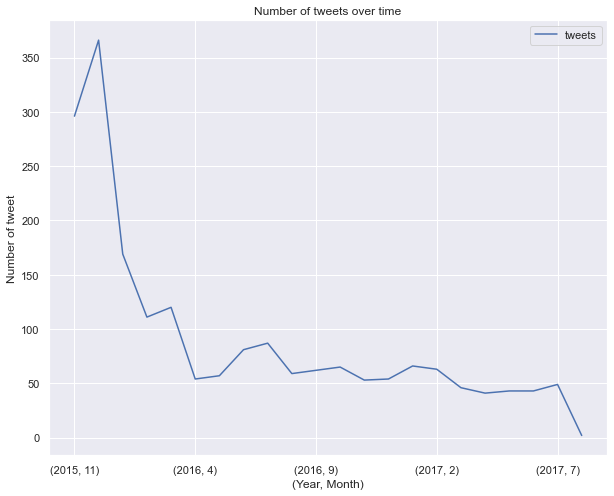

In [207]:
print('As we can see below, WeRateDogs has been losing momentum over time.') 
print('It might be a collateral consequence of Twitter losing users:')
merged_df.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).agg(tweets=('tweet_id', 'count')).plot()
plt.title('Number of tweets over time')
plt.ylabel('Number of tweet')
plt.xlabel('(Year, Month)')
plt.show()

**How are retweet and favorite functions doing over time?**

As visible retweet and favorite functions of Twitter dont seem to have followed a strong pattern:


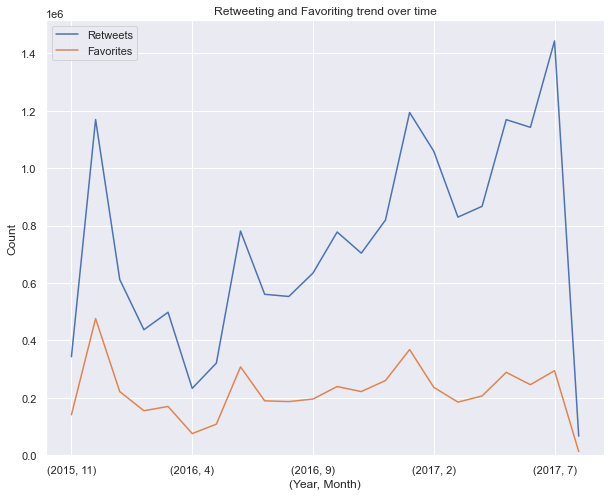

In [208]:
print('As visible retweet and favorite functions of Twitter dont seem to have followed a strong pattern:')
#plt.subplots(1, sharex=True)
merged_df.favorite_count.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).sum().plot()
merged_df.retweet_count.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).sum().plot().set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

**What is the most used device for Twitter?**

We can clearly see that most people are using their cellphone device to access to their account:


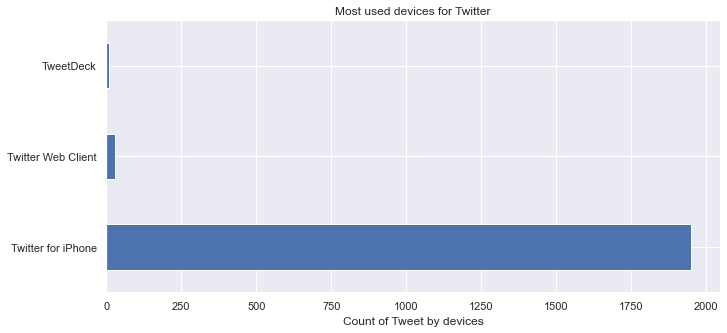

In [209]:
print('We can clearly see that most people are using their cellphone device to access to their account:')
merged_df.source.value_counts().plot(kind='barh',figsize=(11,5), title='Most used devices for Twitter').set_xlabel('Count of Tweet by devices');

**Are there some stages that get more retweet and favorite counts than others?**

Doggo and Pupper seem to be getting most of the retweet and favorite:


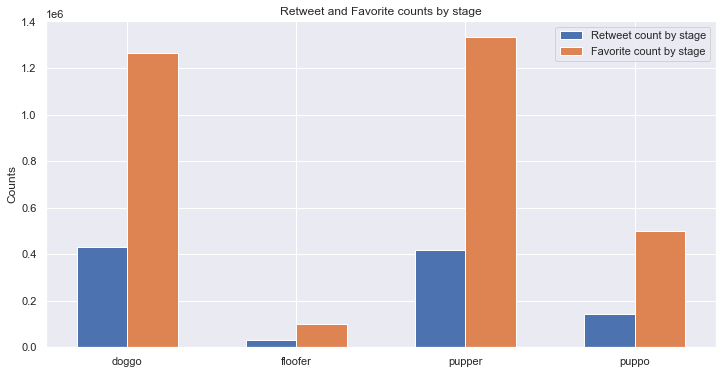

In [210]:
print('Doggo and Pupper seem to be getting most of the retweet and favorite:')
plt1 = merged_df[merged_df['stage'] != 'None'].groupby(['stage'])['retweet_count'].sum()
plt2 = merged_df[merged_df['stage'] != 'None'].groupby(['stage'])['favorite_count'].sum()


# Numbers of pairs of bars you want
N = 4

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3  

# Plotting
plt.bar(ind, plt1 , width, label='Retweet count by stage')
plt.bar(ind + width, plt2, width, label='Favorite count by stage')

plt.ylabel('Counts')
plt.title('Retweet and Favorite counts by stage')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('doggo', 'floofer', 'pupper', 'puppo'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()


**What are the top 5 Breeds that get most of the favorite count?**

In [211]:
plt3 = merged_df.groupby(['breed'])['favorite_count'].agg(count=('favorite_count', 'sum')).sort_values(['count'], ascending = False).head(5)
plt3.reset_index(inplace=True)
plt3.head()

,breed,count
0,golden_retriever,1782411
1,Labrador_retriever,1115302
2,Pembroke,957293
3,Chihuahua,710061
4,French_bulldog,555613


We can now visually see the top 5 breeds in terms of favorite count:


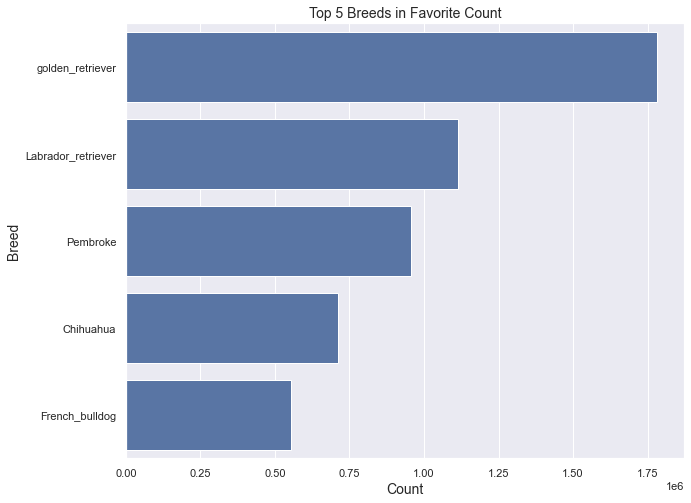

In [212]:
#Let's plot this dataset
print('We can now visually see the top 5 breeds in terms of favorite count:')
g = sns.barplot(data=plt3,x ='count', y ='breed', color = "b")

#plt.gca().invert_yaxis()

# Graph features
plt.title("Top 5 Breeds in Favorite Count", fontsize = 14)
plt.ylabel("Breed", fontsize = 14)
plt.xlabel("Count", fontsize = 14)

plt.show()

**What are the top 5 Breeds that get most of the retweet count?**

In [213]:
plt4 = merged_df.groupby(['breed'])['retweet_count'].agg(count=('retweet_count', 'sum')).sort_values(['count'], ascending = False).head(5)
plt4.reset_index(inplace=True)
plt4.head()

,breed,count
0,golden_retriever,511808
1,Labrador_retriever,342444
2,Pembroke,253945
3,Chihuahua,226709
4,Samoyed,167079


We can now visually see the top 5 breeds in terms of retweet coun.
It is actually fairly similar with the favorite count for the first 4 ones:


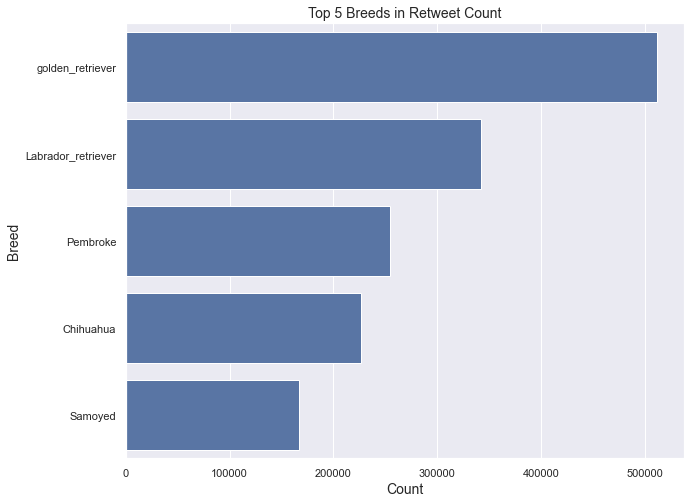

In [214]:
#Let's plot this dataset
print('We can now visually see the top 5 breeds in terms of retweet coun.')
print('It is actually fairly similar with the favorite count for the first 4 ones:')
g = sns.barplot(data=plt4,x ='count', y ='breed', color = "b")

#plt.gca().invert_yaxis()

# Graph features
plt.title("Top 5 Breeds in Retweet Count", fontsize = 14)
plt.ylabel("Breed", fontsize = 14)
plt.xlabel("Count", fontsize = 14)

plt.show()

**What are the most popular name given to dog which are shared on WeRateDogs?**

In [215]:
plt5 = merged_df[(merged_df['name'] != 'None')&(merged_df['name'] != 'a')].groupby(['name'])['tweet_id'].agg(count=('tweet_id', 'count')).sort_values(['count'], ascending = False).head(10)
plt5.reset_index(inplace=True)
plt5.head()

,name,count
0,Oliver,10
1,Charlie,10
2,Cooper,10
3,Tucker,9
4,Penny,9


We can now visually see the top 10 names:


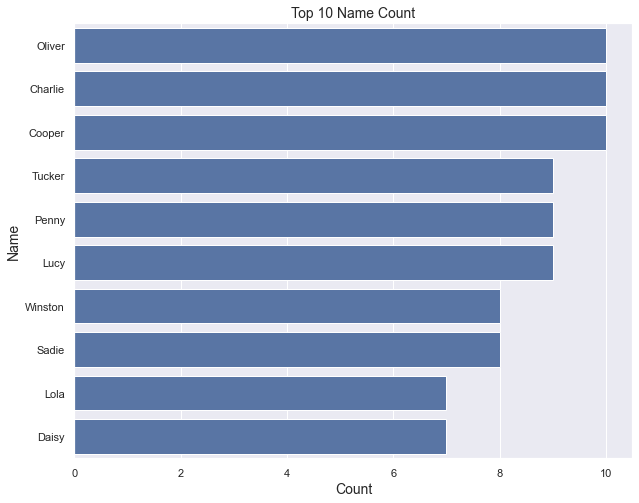

In [216]:
#Let's plot this dataset
print('We can now visually see the top 10 names:')
g = sns.barplot(data=plt5,x ='count', y ='name', color = "b")

#plt.gca().invert_yaxis()

# Graph features
plt.title("Top 10 Name Count", fontsize = 14)
plt.ylabel("Name", fontsize = 14)
plt.xlabel("Count", fontsize = 14)

plt.show()

**Is there any correlation, relationship between tweets that will get retweet & favorite?**

There is a strong relationship betweeb the retweets and favorites:


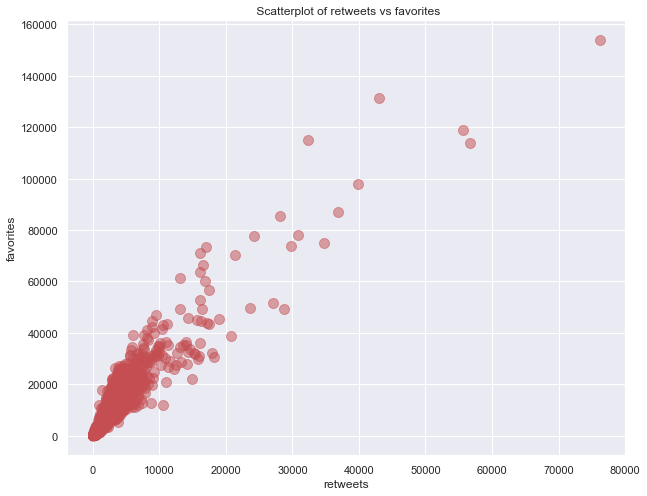

In [217]:
# Create a scatterplot between rating numerator and rating denominator to see their trend
print('There is a strong relationship betweeb the retweets and favorites:')
merged_df.plot(kind='scatter', x="retweet_count", y="favorite_count",alpha=0.5, color='r', s=100)
plt.xlabel('retweets'), plt.ylabel('favorites'),
plt.title(' Scatterplot of retweets vs favorites');

In [218]:
#Setting up the correlation grid to see the relation between retweets and favorites
print('The correlation grid:')
df_of_interest = merged_df[['retweet_count', 'favorite_count']]
corr = df_of_interest.corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation grid:


,retweet_count,favorite_count
retweet_count,1.000000,0.928844
favorite_count,0.928844,1.000000


**As expected after looking at the scatter plot, the correlation coefficient is very strong (0.9288)**

In [92]:
# regex to match fractions
#pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# function which will match the above pattern and return an array of fractions, if any
#def tokens(x):
 # return [m.group(1) for m in re.finditer(pattern, x)]

In [93]:
#Let's right a loop that will go over all the rows to change those for which the denominator is not 10:
#for i, row in twitter_copy[twitter_copy.rating_denominator != 10].iterrows():
 #   d = row.rating_denominator
  #  k = row.rating_numerator
   # if d == 0:
    #    #twitter_copy.rating_denominator.replace(d,10)
     #   twitter_copy.set_value(i, 'rating_denominator', 10)
    #elif d < 10 and k > 10:
        #twitter_copy.rating_denominator.replace(d,10)
     #   twitter_copy.set_value(i, 'rating_denominator', 10)
    #else:
     #   twitter_copy.rating_denominator.replace(d,10)
      #  twitter_copy.rating_numerator.replace(k,(k*10)/d)

In [94]:
#Let's right a loop that will go over all the rows to change those for which the denominator is not 10:
#for i, row in twitter_copy[twitter_copy.rating_denominator != 10].iterrows():
 #   d = row.rating_denominator
  #  k = row.rating_numerator
   # if d == 0:
       # twitter_copy.rating_denominator.replace(d,10, inplace=True)
    #    twitter_copy.rating_denominator.iloc[i] = 10
    #elif d < 10 and k > 10:
        #twitter_copy.rating_denominator.replace(d,10, inplace=True)
     #   twitter_copy.rating_denominator.iloc[i] = 10
    #else:
     #  twitter_copy.rating_denominator.iloc[i] = 10
      # twitter_copy.rating_numerator.iloc[i] = (k*10)/d


In [178]:
#Let's write a function that will pick the first non-NaN value among the doggo, floofer, pupper and puppo columns
#def func(x):
#    if x.values[0] is None:
#       return None 
#    else:        
#       return twitter_copy.loc[x.name, x.values[0]]
#twitter_copy['stage'] = pd.DataFrame(twitter_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x.first_valid_index(), axis=1)).apply(func,axis=1)
         

In [117]:
df_retweet_by_day = merged_df.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).agg(retweets=('retweet_count', 'sum'))
df_favorite_by_day = merged_df.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).agg(favorites=('favorite_count', 'sum'))

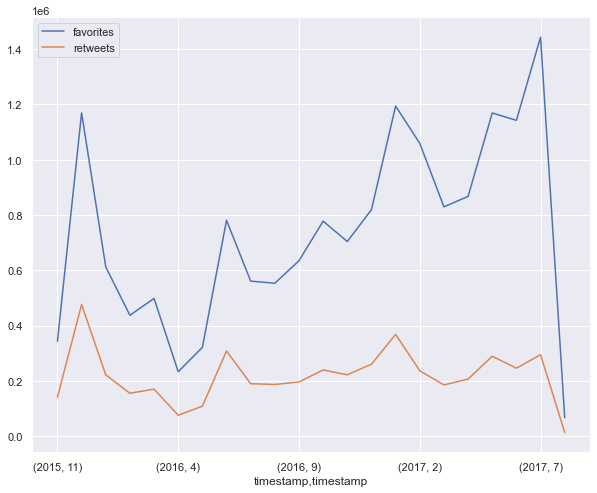

In [118]:
plt0 = df_favorite_by_day.join(df_retweet_by_day)

plt0.plot();